# Lab 6. Análisis de sentimientos

## Miembros
- Fernanda Esquivel 21542
- Sofía Lam 21548

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DS-Lab-06.git)


In [ ]:
import pandas as pd

# EJERCICIO 1




In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

## Variables

Vemos que el dataset tiene 4 variables, el Id que es único para cada tweet. Un Keyword que básicamente hace un resumen de lo que habla el tweet. Location, la cuál nos dice la ubicación de dónde fue publicado el tweet sólo si se tiene activada la ubicación cuando se utiliza la aplicación. Y por último text que es el contenido del tweet.

In [ ]:
null_key = df_train['keyword'].isna().sum()
null_key

61

De acá vemos que hay aproximadamente 26 datos que no tienen una keyword, entonces para no deshacernos de los datos, procedemos a rellenarlos con "no keyword"

In [ ]:
df_train['keyword'] = df_train['keyword'].fillna('no keyword')
df_train['keyword'].isna().sum()

0

In [ ]:
null_loc = df_train['location'].isna().sum()
null_loc

2533

De acá vemos que hay aún más datos sin la ubicación, esto puede deberse a que los usuarios prefieren mantener su ubicación fuera del alcance de la base de datos. Por lo que se procede a rellenar estas casillas con la frase "sin ubicación".

In [ ]:
df_train['location'] = df_train['location'].fillna('sin ubicacion')
df_train['keyword'].isna().sum()

0

In [ ]:
df_train.head()

,id,keyword,location,text,target
0,1,no keyword,sin ubicacion,Our Deeds are the Reason of this #earthquake M...,1
1,4,no keyword,sin ubicacion,Forest fire near La Ronge Sask. Canada,1
2,5,no keyword,sin ubicacion,All residents asked to 'shelter in place' are ...,1
3,6,no keyword,sin ubicacion,"13,000 people receive #wildfires evacuation or...",1
4,7,no keyword,sin ubicacion,Just got sent this photo from Ruby #Alaska as ...,1


Se crea la función que nos permite estandarizar el texto, de manera que se escribe todo el contenido del tweet en minusculas, se retiran los símbolos como "#" o "@". Se eliminan los URLs, los emoticones, los símbolos.

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


def limpiar_texto(texto):

    texto = texto.lower()
    texto = re.sub(r"[#@']", "", texto)
    texto = re.sub(r"http\S+|www\S+|https\S+", "", texto, flags=re.MULTILINE)
    texto = texto.encode('ascii', 'ignore').decode('ascii')
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(texto)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    texto_limpio = ' '.join(tokens)
    return texto_limpio

df_train['texto_limpio'] = df_train['text'].apply(limpiar_texto)
df_train.head()
df_train['texto_limpio'] = df_train['text'].apply(limpiar_texto)
df_train.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,id,keyword,location,text,target,texto_limpio
0,1,no keyword,sin ubicacion,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,no keyword,sin ubicacion,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,no keyword,sin ubicacion,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,no keyword,sin ubicacion,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,no keyword,sin ubicacion,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...


Finalmente tenemos el data frame limpio, para esto se rellenaron los espacios vacíos tanto en la columna keyword como en la columna location. Además, se agregó una columna con el texto del tweet limpio, del cuál se quitaron los símbolos mencionados anteriormente, y las mayusculas, además de que se eliminan los stopwords.

Para ver las diferentes keywords que hay en el data frame test


In [ ]:
# Ver los valores únicos en la columna 'keyword'
unique_keywords = df_train['keyword'].unique()
print("Categorías únicas en 'keyword':")
print(unique_keywords)


Categorías únicas en 'keyword':
['no keyword' 'ablaze' 'accident' 'aftershock' 'airplane%20accident'
 'ambulance' 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army'
 'arson' 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'devastated'
 'd

## Frecuencia de las palabras de los tweets

In [ ]:
tweets_desastre = df_train[df_train['target'] == 1]['texto_limpio']
tweets_no_desastre = df_train[df_train['target'] == 0]['texto_limpio']


Ahora se tokeniza la columna de texto limpio para poder analizar la frecuencia de cada palabra y posteriormente realizar los bigramas, trigramas y las gráficas para el análisis correspondiente

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('punkt')
def contar_frecuencia(tweets):
    todas_las_palabras = ' '.join(tweets).lower()
    tokens = word_tokenize(todas_las_palabras)
    frecuencias = Counter(tokens)
    return frecuencias

frecuencia_desastre = contar_frecuencia(tweets_desastre)
frecuencia_no_desastre = contar_frecuencia(tweets_no_desastre)
print("Palabras más comunes en tweets de desastre:")
print(frecuencia_desastre)
print("\nPalabras más comunes en tweets que no son de desastre:")
print(frecuencia_no_desastre)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Palabras más comunes en tweets de desastre:
Counter({'fire': 180, 'news': 136, 'via': 121, 'disaster': 117, 'california': 111, 'suicide': 110, 'police': 107, 'amp': 106, 'people': 105, 'killed': 93, 'like': 92, 'hiroshima': 86, 'storm': 85, 'crash': 84, 'fires': 84, 'us': 81, 'families': 81, 'train': 79, 'emergency': 76, 'bomb': 75, 'buildings': 75, '2': 73, 'two': 71, 'nuclear': 71, 'mh370': 71, 'attack': 69, 'video': 69, 'wildfire': 69, 'get': 66, 'accident': 66, 'bombing': 66, 'one': 65, 'northern': 64, 'burning': 64, 'dead': 63, 'pm': 62, 'legionnaires': 62, 'bomber': 60, 'im': 58, 'war': 58, 'homes': 58, 'car': 57, 'still': 57, 'new': 56, 'atomic': 56, 'dont': 54, 'obama': 54, 'fatal': 54, 'years': 53, 'collapse': 51, 'may': 50, 'forest': 50, 'debris': 50, 'watch': 50, 'first': 49, 'japan': 49, 'malaysia': 49, 'man': 48, 'latest': 48, 'water': 48, 'mass': 48, 'near': 47, 'rt': 47, 'severe': 47, 'today': 46, 'earthquake': 45, 'confirmed': 45, 'found': 44, 'oil': 44, 'home': 42, 'ar

In [ ]:
# Palabra más repetida en tweets de desastre
palabra_mas_comun_desastre = frecuencia_desastre.most_common(1)
print(f"Palabra más repetida en tweets de desastre: {palabra_mas_comun_desastre}")

# Palabra más repetida en tweets que no son de desastre
palabra_mas_comun_no_desastre = frecuencia_no_desastre.most_common(1)
print(f"Palabra más repetida en tweets que no son de desastre: {palabra_mas_comun_no_desastre}")


Palabra más repetida en tweets de desastre: [('fire', 180)]
Palabra más repetida en tweets que no son de desastre: [('like', 253)]


Como vemos anteriormente, la palbra más común para aquellos tweets sobre desastres es "fire". Mientras que para aquellos tweets que no hablan de un desastre la palabra más común es "like".

1. **¿Qué palabras cree que le servirán para hacer un mejor modelo de clasificación?**

   - Las palabras que expresan emociones y sentimientos y su intensidad o qué tan fuerte se sienten son importantes para poder realizar la clasificación. Para esto se utilizará la librería de SentiWords en python, para poder llevar a cabo su identificación y clasificación.

2. **¿Vale la pena explorar bigramas o trigramas para analizar contexto?**

   - Sí, explorar bigramas y trigramas es útil para capturar combinaciones de palabras que pueden proporcionar contexto adicional y matices en el análisis de sentimientos.

## ANÁLISIS EXPLORATORIO

### Bigramas y Trigramas
Ahora bien, realizamos los bigramas y trigramas para poder analizar aquellas palabras que tienden a ir juntas en los tweets.

In [ ]:
from nltk import bigrams, trigrams

# Función para contar la frecuencia de bigramas
def contar_bigramas(tweets):
    todas_las_palabras = ' '.join(tweets).lower()
    tokens = word_tokenize(todas_las_palabras)
    bigrama_frecuencia = Counter(bigrams(tokens))
    return bigrama_frecuencia

# Función para contar la frecuencia de trigramas
def contar_trigramas(tweets):
    todas_las_palabras = ' '.join(tweets).lower()
    tokens = word_tokenize(todas_las_palabras)
    trigrama_frecuencia = Counter(trigrams(tokens))
    return trigrama_frecuencia

# Obtener frecuencias de bigramas y trigramas para tweets de desastre
bigramas_desastre = contar_bigramas(tweets_desastre)
trigramas_desastre = contar_trigramas(tweets_desastre)

print("\nBigramas más comunes en tweets de desastre:")
print(bigramas_desastre.most_common(10))

print("\nTrigramas más comunes en tweets de desastre:")
print(trigramas_desastre.most_common(10))



Bigramas más comunes en tweets de desastre:
[(('suicide', 'bomber'), 59), (('northern', 'california'), 41), (('oil', 'spill'), 38), (('burning', 'buildings'), 35), (('suicide', 'bombing'), 34), (('california', 'wildfire'), 34), (('70', 'years'), 30), (('bomber', 'detonated'), 30), (('confirmed', 'mh370'), 29), (('homes', 'razed'), 29)]

Trigramas más comunes en tweets de desastre:
[(('suicide', 'bomber', 'detonated'), 30), (('northern', 'california', 'wildfire'), 29), (('latest', 'homes', 'razed'), 28), (('homes', 'razed', 'northern'), 28), (('pkk', 'suicide', 'bomber'), 28), (('bomber', 'detonated', 'bomb'), 28), (('razed', 'northern', 'california'), 27), (('16yr', 'old', 'pkk'), 27), (('old', 'pkk', 'suicide'), 27), (('families', 'sue', 'legionnaires'), 26)]


De esto podemos ver que el bigrama más común en los tweets de desastre es "(suicide, bomber)"y el trigrama más común para estos mismos tweets es "(suicide, bomber, detonated)"

### Nube de palabras
Ahora se crea una nube de palabras sobre cada tweet según su categoría

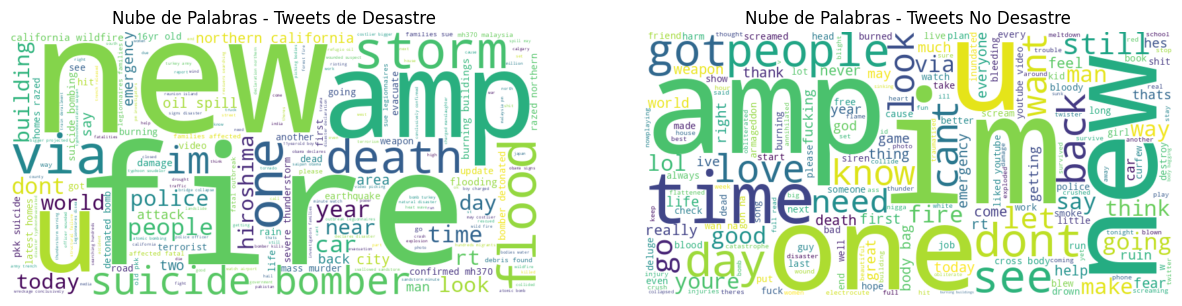

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud_desastre = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tweets_desastre))
wordcloud_no_desastre = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tweets_no_desastre))
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_desastre, interpolation='bilinear')
plt.title('Nube de Palabras - Tweets de Desastre')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_no_desastre, interpolation='bilinear')
plt.title('Nube de Palabras - Tweets No Desastre')
plt.axis('off')
plt.show()


### Histogramas
Ahora realizamos los histogramas con las palbras más repetidas según los distintos tweets

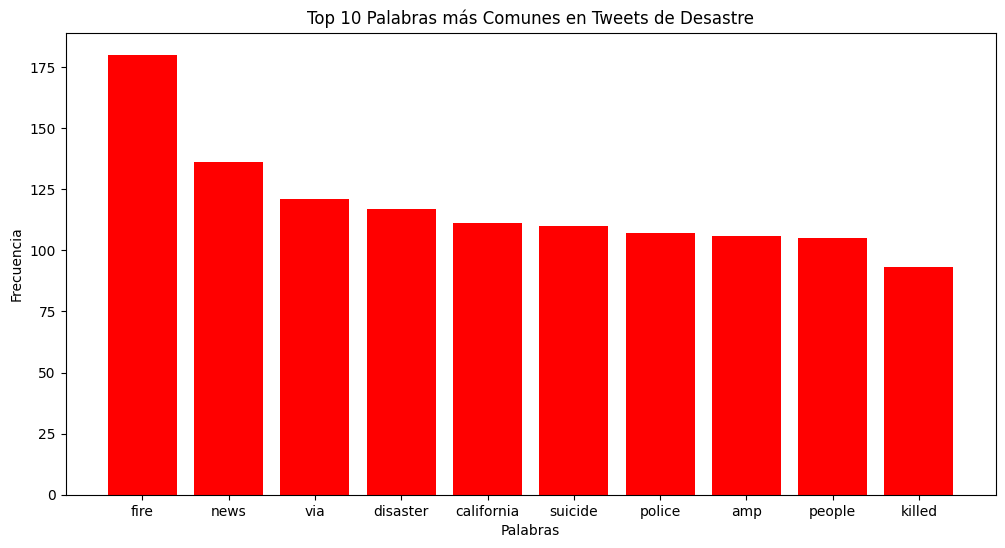

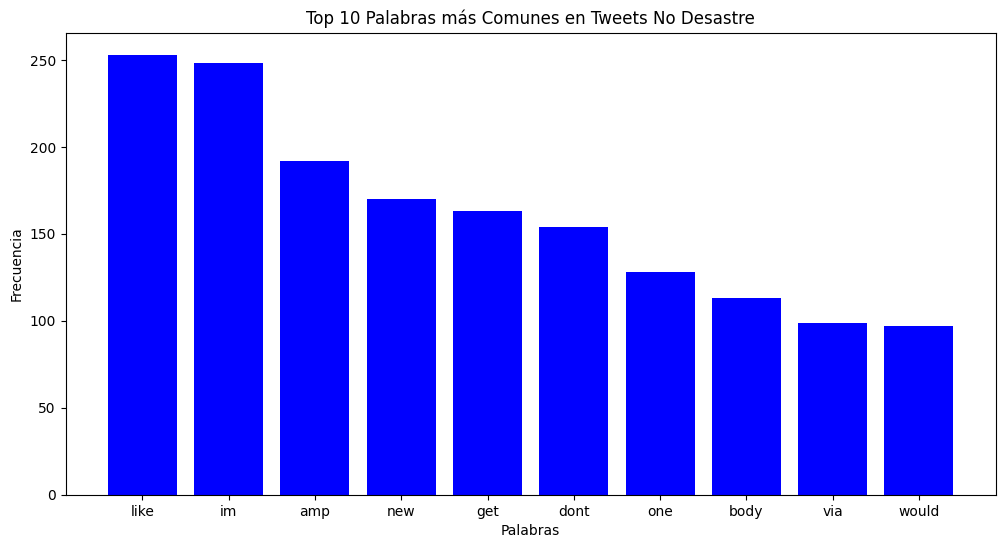

In [ ]:
frecuencias_desastre_top10 = frecuencia_desastre.most_common(10)
palabras_desastre, conteos_desastre = zip(*frecuencias_desastre_top10)
plt.figure(figsize=(12, 6))
plt.bar(palabras_desastre, conteos_desastre, color='red')
plt.title('Top 10 Palabras más Comunes en Tweets de Desastre')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

frecuencias_no_desastre_top10 = frecuencia_no_desastre.most_common(10)
palabras_no_desastre, conteos_no_desastre = zip(*frecuencias_no_desastre_top10)
plt.figure(figsize=(12, 6))
plt.bar(palabras_no_desastre, conteos_no_desastre, color='blue')
plt.title('Top 10 Palabras más Comunes en Tweets No Desastre')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()


Ahora buscamos aquellas palabras que son comunes en ambas categorías

In [ ]:
palabras_comunes = set(frecuencia_desastre.keys()).intersection(set(frecuencia_no_desastre.keys()))
print("Palabras comunes en ambas categorías:")
print(palabras_comunes)

Palabras comunes en ambas categorías:
{'2011', 'beliefs', 'any1', 'saturn', 'gmt', 'lakes', 'mess', 'letter', 'client', 'sand', 'placing', 'killing', 'quarantine', 'electrocuted', 'allow', 'cancel', 'attitude', 'electro', 'august', 'speaking', 'mechanical', 'prime', 'jewish', 'loving', 'specimens', 'nights', 'traveling', 'blame', 'shooting', 'hits', 'row', 'hijack', 'british', 'maker', 'extender', 'bringing', 'vietnamese', 'med', 'ray', 'exactly', 'seeing', 'mate', 'closed', 'match', 'global', 'blocks', 'lights', 'seriously', 'design', 'buddys', 'beard', 'track', 'specially', 'shoulders', 'vine', 'running', 'limit', 'directioners', 'date', 'n', 'fun', 'lead', 'mr', 'worked', 'gays', 'appreciated', 'leather', 'financial', 'exploration', 'mega', 'supply', 'former', 'sewer', 'upper', 'thus', 'md', 'anybody', 'citys', 'prince', 'warne', 'management', 'mini', 'narendramodi', 'fatalities', 'security', 'bin', 'lions', 'record', 'accident', 'cake', 'forbes', 'exacerbated', 'rains', 'jacksonvil

### Determinar palabras positivas, negativas o neutras

In [27]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Clasificar palabras y separarlas en categorías
positivas = []
negativas = []
neutral = []

for word in palabras_comunes:
    score = sia.polarity_scores(word)['compound']
    if score >= 0.05:
        positivas.append(word)
    elif score <= -0.05:
        negativas.append(word)
    else:
        neutral.append(word)

print("Positive words:", positivas)
print("Negative words:", negativas)
print("Neutral words:", neutral)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Positive words: ['allow', 'loving', 'fun', 'appreciated', 'exploration', 'security', 'increased', 'dream', 'legal', 'party', 'freeway', 'charity', 'greatest', 'expand', 'restore', 'haha', 'justice', 'loved', 'strongly', 'admits', 'vital', 'careful', 'comedy', 'excellent', 'trust', 'god', 'funny', 'safer', 'interesting', 'protect', 'agree', 'mercy', 'giving', 'yeah', 'surprised', 'free', 'playing', 'commit', 'play', 'best', 'responsible', 'sure', 'relief', 'dignity', 'vip', 'save', 'bargain', 'pray', 'helps', 'certainly', 'share', 'calm', 'exclusive', 'extends', 'glorious', 'values', 'hope', 'care', 'friend', 'perfect', 'luck', 'feeling', 'number', 'worth', 'defense', 'xd', 'ok', 'progress', 'liked', 'recommend', 'hopefully', 'favorites', 'yay', 'escape', 'yes', 'heartwarming', 'beauty', 'lovely', 'natural', 'super', 'promise', 'reward', 'prepared', 'favorite', 'united', 'top', 'smart', 'talent', 'brave', 'friends', 'safety', 'forgiven', 'certain', 'esteemed', 'okay', 'gift', 'engage', 

In [25]:
tweets_desastre_df = pd.DataFrame(tweets_desastre, columns=['texto_limpio'])
tweets_no_desastre_df = pd.DataFrame(tweets_no_desastre, columns=['texto_limpio'])

In [28]:
# Función para clasificar el tweet basado en las listas de palabras
def clasificar_tweet(tweet):
    palabras = tweet.lower().split()  # Convertir el tweet a minúsculas y dividirlo en palabras
    conteo_positivo = sum(word in positivas for word in palabras)
    conteo_negativo = sum(word in negativas for word in palabras)
    conteo_neutro = sum(word in neutral for word in palabras)

    if conteo_positivo > conteo_negativo:
        return 'Positivo'
    elif conteo_negativo > conteo_positivo:
        return 'Negativo'
    else:
        return 'Neutral'

# Aplicar la función a cada tweet en el DataFrame
tweets_desastre_df['clasificacion'] = tweets_desastre_df['texto_limpio'].apply(clasificar_tweet)
tweets_no_desastre_df['clasificacion'] = tweets_no_desastre_df['texto_limpio'].apply(clasificar_tweet)

In [29]:
tweets_no_desastre_df.head()

,texto_limpio,clasificacion
15,whats man,Neutral
16,love fruits,Positivo
17,summer lovely,Positivo
18,car fast,Neutral
19,goooooooaaaaaal,Neutral


In [30]:
tweets_desastre_df.head()

,texto_limpio,clasificacion
0,deeds reason earthquake may allah forgive us,Positivo
1,forest fire near la ronge sask canada,Negativo
2,residents asked shelter place notified officer...,Neutral
3,13000 people receive wildfires evacuation orde...,Neutral
4,got sent photo ruby alaska smoke wildfires pou...,Neutral


In [33]:
import pandas as pd
df_train['clasificacion'] = df_train['texto_limpio'].apply(clasificar_tweet)

def contar_palabras(tweet):
    palabras = tweet.lower().split()
    conteo_positivo = sum(word in positivas for word in palabras)
    conteo_negativo = sum(word in negativas for word in palabras)
    return conteo_positivo, conteo_negativo


df_train['conteo_positivo'], df_train['conteo_negativo'] = zip(*df_train['texto_limpio'].apply(contar_palabras))

df_train['score'] = df_train['conteo_negativo'] - df_train['conteo_positivo']  # Métrica para negatividad/positividad


# 10 Tweets más negativos

In [37]:
tweets_negativos = df_train.sort_values(by='score', ascending=False)  # Ordenar por negatividad
top_10_negativos = tweets_negativos.head(10)
print("10 tweets más negativos:")
print(top_10_negativos[['texto_limpio', 'score', 'clasificacion', "target"]])


10 tweets más negativos:
                                           texto_limpio  score clasificacion  \
7472  wreck wreck wreck wreck wreck wreck wreck wrec...     13      Negativo   
4561  udhampur terror attack militants attack police...      6      Negativo   
4547  udhampur terror attack militants attack police...      6      Negativo   
4556  udhampur terror attack militants attack police...      6      Negativo   
2932  lake sees dead fish poor little guy wonder hap...      5      Negativo   
1540  bomb crash loot riot emergency pipe bomb nucle...      5      Negativo   
3623  understand fatalities one trapped inside whole...      5      Negativo   
3742  misshomasttopa cause fire fire fire yeah fire ...      5      Negativo   
6414  abubaraa1 suicide bomber targets saudi mosque ...      5      Negativo   
5989  himeruisu im going ram ass hard ill shove face...      5      Negativo   

      target  
7472       0  
4561       1  
4547       1  
4556       1  
2932       0  
1540

Como podemos ver anteriormente, 7 de los 10 tweets más negativos hablan de un desastre.

# 10 Tweets más positivos

In [36]:
tweets_positivos = df_train.sort_values(by='score', ascending=True)  # Ordenar por positividad
top_10_positivos = tweets_positivos.head(10)
print("10 tweets más positivos:")
print(top_10_positivos[['texto_limpio', 'score', 'clasificacion', "target"]])

10 tweets más positivos:
                                           texto_limpio  score clasificacion  \
6992  check want twister tickets vip experience see ...     -6      Positivo   
3816  whats cool teens becoming like call digital fi...     -5      Positivo   
1909  disillusioned lead character check happy go lu...     -5      Positivo   
6295  free ebay sniping rt lumbar extender back stre...     -5      Positivo   
6560  duchovbutt starbuckscully madmakny davidduchov...     -5      Positivo   
5027  gbbo difference paul mary dears paul looks lik...     -4      Positivo   
4304  prophet peace upon said save hellfire even giv...     -4      Positivo   
4286  prophet peace upon said save hellfire even giv...     -4      Positivo   
1567             ok peace hope fall cliff along dignity     -4      Positivo   
4284  prophet peace upon said save hellfire even giv...     -4      Positivo   

      target  
6992       0  
3816       0  
1909       0  
6295       0  
6560       0  
5027

Como podemos ver anteriormente, 9 de los 10 tweets más positivos no son sobre un desastre.

De esto y de la proporción de los tweets negativos podemos decir que los tweets sobre desastre son negativos, mientras que los tweets que no son de desastres son positivos, y que la clasificación funciona correctamente.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

df_train['score'] = df_train['conteo_negativo'] - df_train['conteo_positivo']


X = df_train[['texto_limpio', 'score']]
y = df_train['target']


tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X['texto_limpio'])


from scipy.sparse import hstack

X_tfidf_score = hstack([X_tfidf, X[['score']].values])

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf_score, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_tfidf, y_train)

y_pred_rf = rf.predict(X_test_tfidf)

print("Random Forest with Negativity Score")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest with Negativity Score
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       874
           1       0.81      0.62      0.70       649

    accuracy                           0.78      1523
   macro avg       0.79      0.76      0.76      1523
weighted avg       0.78      0.78      0.77      1523

[[782  92]
 [247 402]]


De esto vemos que el modelo disminuyó en precisión a comparación del modelo anterior. Esto puede deberse a la inclusión de la nueva variable.

# Ejercicio 2

## Limpieza y preprocesamiento de los datos

In [ ]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords

In [ ]:
#Carga de los datos
df_ej2 = pd.read_csv('GrammarandProductReviews.csv')

In [ ]:
# Definir función de limpieza
def cleanText(text):
    #Convertir a minúsculas
    text = text.lower()

    #Quitar las URL
    text = re.sub(r'http\S+|www.\S+', '', text)

    #Quitar los caracteres especiales como “#”, ”@” o apóstrofes
    text = re.sub(r'[@#]', '', text)

    #Quitar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))

    #Quitar números
    text = re.sub(r'\d+', '', text)

    #Quitar emoticones (opcional, dependiendo de su valor informativo)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Solo caracteres ASCII

    #Quitar stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

In [ ]:
#Aplicar la función de limpieza a la columna de reseñas
df_ej2['cleaned_reviews'] = df_ej2['reviews.text'].apply(lambda x: cleanText(str(x)))

#Imprimir las primeras filas para verificar
print(df_ej2[['reviews.text', 'cleaned_reviews']].head())

                                        reviews.text  \
0  i love this album. it's very good. more to the...   
1  Good flavor. This review was collected as part...   
2                                       Good flavor.   
3  I read through the reviews on here before look...   
4  My husband bought this gel for us. The gel cau...   

                                     cleaned_reviews  
0  love album good hip hop side current pop sound...  
1        good flavor review collected part promotion  
2                                        good flavor  
3  read reviews looking buying one couples lubric...  
4  husband bought gel us gel caused irritation fe...  


In [ ]:
#Guardar el resultado en un nuevo archivo CSV
df_ej2.to_csv('cleanedGrammarandProductReviews.csv', index=False)

## Análisis exploratorio

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
#Cargar el archivo con los datos limpios
df_cleaned = pd.read_csv('cleanedGrammarandProductReviews.csv')

#Asegurarse de que los textos estén en formato string
df_cleaned['cleaned_reviews'] = df_cleaned['cleaned_reviews'].astype(str)

In [ ]:
#Función para encontrar la palabra más repetida
def findMostCommonWords(reviews, n=10):
    allWords = ' '.join(reviews).split()
    wordCounts = Counter(allWords)
    return wordCounts.most_common(n)

#Obtener las 10 palabras más comunes
commonWords = findMostCommonWords(df_cleaned['cleaned_reviews'])
print("Palabras más comunes:", commonWords)

Palabras más comunes: [('great', 20946), ('product', 20272), ('movie', 19737), ('review', 18907), ('part', 18666), ('promotion', 17734), ('collected', 17726), ('love', 16899), ('use', 15953), ('good', 12202)]


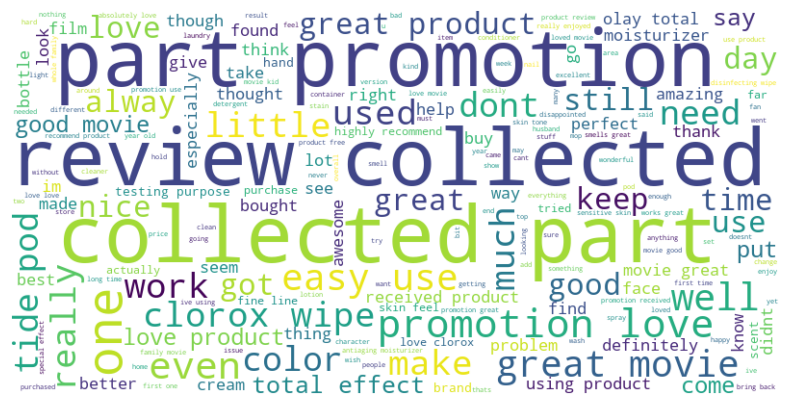

In [ ]:
#Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_cleaned['cleaned_reviews']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

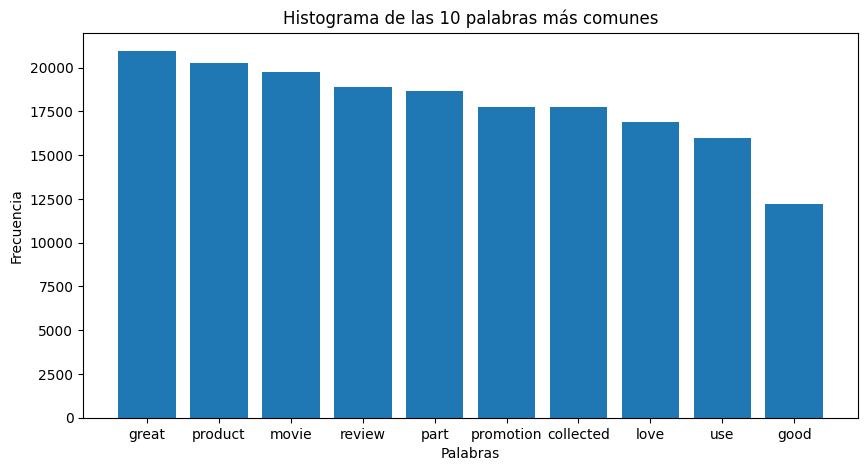

In [ ]:
#Crear un histograma de las palabras más repetidas
wordCounts = Counter(' '.join(df_cleaned['cleaned_reviews']).split())
mostCommonWords = dict(wordCounts.most_common(10))

plt.figure(figsize=(10, 5))
plt.bar(mostCommonWords.keys(), mostCommonWords.values())
plt.title('Histograma de las 10 palabras más comunes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
#Determinar palabras presentes en todas las reseñas
def findCommonWordsAcrossReviews(df):
    review_words = [set(review.split()) for review in df['cleaned_reviews']]
    common_words = set.intersection(*review_words)
    return common_words

commonAcrossReviews = findCommonWordsAcrossReviews(df_cleaned)
print("Palabras presentes en todas las reseñas:", commonAcrossReviews)

Palabras presentes en todas las reseñas: set()


In [ ]:
#Análisis de palabras positivas y negativas usando VADER (análisis de sentimientos)
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Añadir columnas de sentimiento
df_cleaned['sentiment'] = df_cleaned['cleaned_reviews'].apply(lambda review: sia.polarity_scores(review))

In [ ]:
#Separar las palabras positivas y negativas
df_cleaned['positive_words'] = df_cleaned['cleaned_reviews'].apply(lambda review: [word for word in review.split() if sia.polarity_scores(word)['compound'] > 0])
df_cleaned['negative_words'] = df_cleaned['cleaned_reviews'].apply(lambda review: [word for word in review.split() if sia.polarity_scores(word)['compound'] < 0])

In [ ]:
#Mostrar algunas palabras positivas
print("Palabras positivas más comunes:")
positiveWords = Counter([word for words in df_cleaned['positive_words'] for word in words])
print(positiveWords.most_common(10))

Palabras positivas más comunes:
[('great', 20946), ('love', 16899), ('good', 12202), ('like', 11332), ('clean', 7726), ('well', 6325), ('easy', 5770), ('best', 4551), ('recommend', 4291), ('loved', 3970)]


In [ ]:
#Mostrar algunas palabras negativas
print("\nPalabras negativas más comunes:")
negativeWords = Counter([word for words in df_cleaned['negative_words'] for word in words])
print(negativeWords.most_common(10))


Palabras negativas más comunes:
[('leave', 1401), ('hard', 1381), ('bad', 1290), ('disappointed', 1202), ('problem', 1038), ('mess', 879), ('broke', 644), ('ill', 560), ('problems', 499), ('stop', 494)]


## Clasificación de reseñas

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
#Inicializar el analizador de sentimientos VADER
sia = SentimentIntensityAnalyzer()

In [ ]:
#Añadir la puntuación de sentimiento total para cada reseña
df_cleaned['sentiment_score'] = df_cleaned['cleaned_reviews'].apply(lambda review: sia.polarity_scores(review)['compound'])

In [ ]:
#Clasificar las reseñas en positivas, negativas o neutrales
def classifySentiment(score):
    if score >= 0.05:
        return 'Positivo'
    elif score <= -0.05:
        return 'Negativo'
    else:
        return 'Neutral'

df_cleaned['sentiment_label'] = df_cleaned['sentiment_score'].apply(classifySentiment)

In [ ]:
#Verificar los resultados
print(df_cleaned[['cleaned_reviews', 'sentiment_score', 'sentiment_label']].head())

                                     cleaned_reviews  sentiment_score  \
0  love album good hip hop side current pop sound...           0.6908   
1        good flavor review collected part promotion           0.4404   
2                                        good flavor           0.4404   
3  read reviews looking buying one couples lubric...          -0.7305   
4  husband bought gel us gel caused irritation fe...          -0.4423   

  sentiment_label  
0        Positivo  
1        Positivo  
2        Positivo  
3        Negativo  
4        Negativo  


In [ ]:
#Guardar los resultados en un archivo CSV
df_cleaned.to_csv('sentimentClassifiedReviews.csv', index=False)

In [ ]:
#Contar la cantidad de reseñas positivas, negativas y neutrales
sentimentCounts = df_cleaned['sentiment_label'].value_counts()

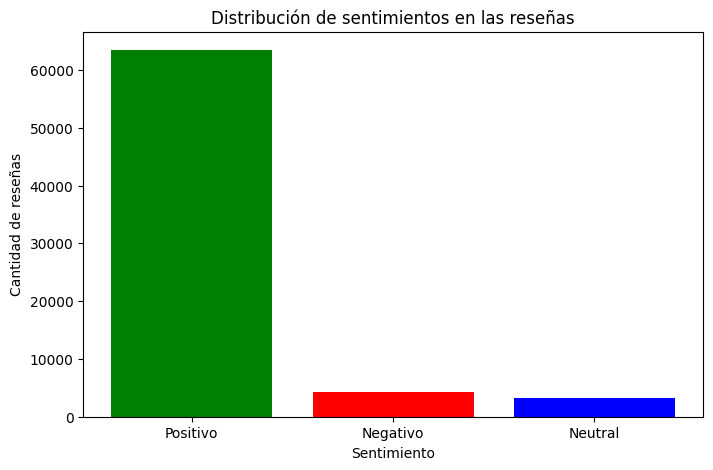

In [ ]:
#Mostrar un gráfico de la distribución de sentimientos
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(sentimentCounts.index, sentimentCounts.values, color=['green', 'red', 'blue'])
plt.title('Distribución de sentimientos en las reseñas')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de reseñas')
plt.show()

### Explicación del algoritmo utilizado
El algoritmo utilizado para clasificar las reseñas en positivas, negativas o neutras se basa en el análisis de sentimientos con el modelo VADER (Valence Aware Dictionary and sEntiment Reasoner). Este modelo calcula una puntuación de sentimiento llamada "compound score" para cada reseña, que varía entre -1 (muy negativo) y 1 (muy positivo).

* Si la puntuación es mayor o igual a 0.05, la reseña se clasifica como positiva.
* Si la puntuación es menor o igual a -0.05, la reseña se clasifica como negativa.
* Si la puntuación está entre -0.05 y 0.05, se clasifica como neutral.

Este enfoque permite una clasificación rápida y efectiva de los sentimientos en texto natural.

## Resultados inciso 6

In [ ]:
#Cargar el archivo que ya contiene las reseñas clasificadas
df_classified = pd.read_csv('sentimentClassifiedReviews.csv')

### Los 10 productos de mejor calidad dado su reseña

In [ ]:
#6.1. Los 10 productos de mejor calidad (más reseñas positivas)
bestProducts = df_classified[df_classified['sentiment_label'] == 'Positivo'].groupby('name').size().sort_values(ascending=False).head(10)
print("Top 10 productos de mejor calidad:\n", bestProducts)

Top 10 productos de mejor calidad:
 name
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         7829
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)                              5264
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)                          3188
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   2980
Tide Original Liquid Laundry Detergent - 100 Oz                                   2919
Olay Total Effects Daily Moisturizer, 7-In-1 Anti-Aging, 0.5oz                    2582
The Jungle Book (blu-Ray/dvd + Digital)                                           2355
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    2202
L'oreal Paris Revitalift Triple Power Deep-Acting Moisturizer                     2101
Clorox Disinfecting Bathroom Cleaner                                              1926
dtype: int64


### Los 10 productos de menor calidad dado su reseña

In [ ]:
#6.2. Los 10 productos de peor calidad (más reseñas negativas)
worstProducts = df_classified[df_classified['sentiment_label'] == 'Negativo'].groupby('name').size().sort_values(ascending=False).head(10)
print("Top 10 productos de peor calidad:\n", worstProducts)

Top 10 productos de peor calidad:
 name
Rubbermaid174 Reveal Spray Mop                                     447
Tide Original Liquid Laundry Detergent - 100 Oz                    422
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total          308
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)           281
Nexxus Exxtra Gel Style Creation Sculptor                          224
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd    201
Olay Total Effects Daily Moisturizer, 7-In-1 Anti-Aging, 0.5oz     136
Sausage Party (4k/uhd + Digital)                                   115
The Resident Evil Collection 5 Discs (blu-Ray)                     104
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)                97
dtype: int64


### Los usuarios que dan la mayor cantidad de reseñas a distintos productos.

In [ ]:
#6.3. Los usuarios que dan la mayor cantidad de reseñas a distintos productos
topReviewers = df_classified.groupby('reviews.username').size().sort_values(ascending=False).head(10)
print("Usuarios que más reseñas han dado:\n", topReviewers)

Usuarios que más reseñas han dado:
 reviews.username
An anonymous customer    421
Anonymous                113
Mike                     105
Chris                     88
ByAmazon Customer         58
Dave                      57
John                      49
Rick                      41
James                     32
Robert                    31
dtype: int64


### Los usuarios que más reseñas negativas y positivas dan en promedio

In [ ]:
#6.4. Los usuarios que más reseñas negativas y positivas dan en promedio
#Contar reseñas positivas y negativas por usuario
userSentimentCounts = df_classified.groupby(['reviews.username', 'sentiment_label']).size().unstack(fill_value=0)

In [ ]:
#Usuarios con más reseñas positivas en promedio
topPositiveReviewers = userSentimentCounts['Positivo'].sort_values(ascending=False).head(10)
print("Usuarios que más reseñas positivas han dado:\n", topPositiveReviewers)

Usuarios que más reseñas positivas han dado:
 reviews.username
An anonymous customer    366
Mike                     100
Anonymous                 91
Chris                     79
Dave                      54
John                      44
ByAmazon Customer         41
Rick                      34
Robert                    28
James                     28
Name: Positivo, dtype: int64


In [ ]:
#Usuarios con más reseñas negativas en promedio
topNegativeReviewers = userSentimentCounts['Negativo'].sort_values(ascending=False).head(10)
print("Usuarios que más reseñas negativas han dado:\n", topNegativeReviewers)

Usuarios que más reseñas negativas han dado:
 reviews.username
An anonymous customer    34
ByAmazon Customer        16
Anonymous                 7
Cool                      4
Chris                     4
Mike                      4
Lisa                      4
Bobcat                    3
Rich                      3
Rick                      3
Name: Negativo, dtype: int64


### Los productores que tienen productos de mejor calidad

In [ ]:
#6.5. Los productores que tienen productos de mejor calidad (más reseñas positivas)
bestProducers = df_classified[df_classified['sentiment_label'] == 'Positivo'].groupby('manufacturer').size().sort_values(ascending=False).head(10)
print("Productores con productos de mejor calidad:\n", bestProducers)

Productores con productos de mejor calidad:
 manufacturer
Clorox                           7830
Universal                        5898
Twentieth Century Fox            3880
Test                             2980
Procter & Gamble                 2924
PROCTER & GAMBLE COMPANY, THE    2582
Buena Vista                      2355
L'oreal Paris                    2287
L'Oreal Paris                    2101
AmazonUs/CLOO7                   1926
dtype: int64


### Los productores que tienen productos de peor calidad

In [ ]:
#6.6. Los productores que tienen productos de peor calidad (más reseñas negativas)
worstProducers = df_classified[df_classified['sentiment_label'] == 'Negativo'].groupby('manufacturer').size().sort_values(ascending=False).head(10)
print("Productores con productos de peor calidad:\n", worstProducers)

Productores con productos de peor calidad:
 manufacturer
Rubbermaid                       447
Procter & Gamble                 422
Twentieth Century Fox            321
Clorox                           308
Nexxus Beauty Products           224
Test                             201
PROCTER & GAMBLE COMPANY, THE    136
Universal                        118
Sony Pictures                    115
SONY CORP                        104
dtype: int64


## Estrategia para mejorar productos con reseñas negativas
Esta estrategia está respaldada por datos y un análisis exhaustivo de las reseñas, específicamente enfocándose en las palabras clave negativas que reflejan la insatisfacción de los usuarios. Al abordar directamente las áreas problemáticas más mencionadas, la empresa puede mejorar su reputación y reducir el número de reseñas negativas en el futuro.

### Análisis de palabras frecuentes en reseñas negativas
Utilizando el análisis de las palabras más repetidas en las reseñas negativas, es probable que se identifiquen patrones o temas comunes que reflejen los problemas clave de los productos. Por ejemplo, si palabras como "calidad", "defectuoso", "caro" o "funciona mal" se repiten con frecuencia, esto indica que los usuarios están insatisfechos con la durabilidad, funcionalidad o relación calidad-precio de los productos.

### Propuesta de Mejora:

* Calidad del Producto: Si el término "calidad" o sinónimos relacionados con fallos técnicos aparecen frecuentemente en las reseñas, se recomendaría mejorar los procesos de control de calidad.

* Precios y Valor: Si las reseñas mencionan frecuentemente palabras como "caro" o "no vale la pena", la empresa debería reconsiderar su estrategia de precios o mejorar las características de los productos para justificar el costo.

* Atención al Cliente: Si los clientes mencionan frecuentemente problemas relacionados con el servicio postventa, la empresa debería invertir en la mejora del soporte al cliente, como ofrecer garantías más extendidas o un servicio técnico más ágil para gestionar devoluciones o reparaciones.

### Monitoreo y Retroalimentación Continua
Implementar un sistema de monitoreo constante de las reseñas y opiniones para identificar rápidamente nuevas tendencias de insatisfacción.

### Campaña de Relanzamiento
Una vez implementadas las mejoras en los productos, se recomienda llevar a cabo una campaña de marketing enfocada en resaltar los cambios realizados.